In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
from sklearn.svm import SVR


train_df = pd.read_csv('TQ_Train_Kaggle.csv')
test_df = pd.read_csv('TQ_Test_Kaggle.csv')




In [3]:
# Replace NaN values with column means
imputer = SimpleImputer(strategy='mean')
train_df_imputed = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
test_df_imputed = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)

In [14]:
# Calculate correlation matrix
correlation_matrix = train_df_imputed.corr()

# Get the absolute correlation values with the target
correlation_with_target = correlation_matrix['target'].abs().sort_values(ascending=False)

# Select top 40 features with highest correlation with the target
top_features = correlation_with_target[(correlation_with_target > 0.005) & (correlation_with_target.index != 'target')].index

In [15]:
# Prepare training and test datasets with selected features
X_train = train_df_imputed[top_features]
y_train = train_df_imputed['target']

X_test = test_df_imputed[top_features]
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [16]:

# Standardize the features
scaler = StandardScaler()
X_train_split = scaler.fit_transform(X_train_split)
X_test_split = scaler.transform(X_test_split)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Initialize SVM regressor
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_split, y_train_split)
y_pred = svm_regressor.predict(X_test_split)


In [17]:
mse_best = mean_squared_error(y_test_split, y_pred)
r2_best = r2_score(y_test_split, y_pred)

print("Mean Squared Error (MSE) with best model:", mse_best)
print("R-squared (R2) Score with best model:", r2_best)




Mean Squared Error (MSE) with best model: 0.004247067922438401
R-squared (R2) Score with best model: -0.003955804429097931


In [9]:
y_pred

array([ 0.00616809, -0.01069317, -0.00095   , ..., -0.00430697,
       -0.00083049,  0.00807798])

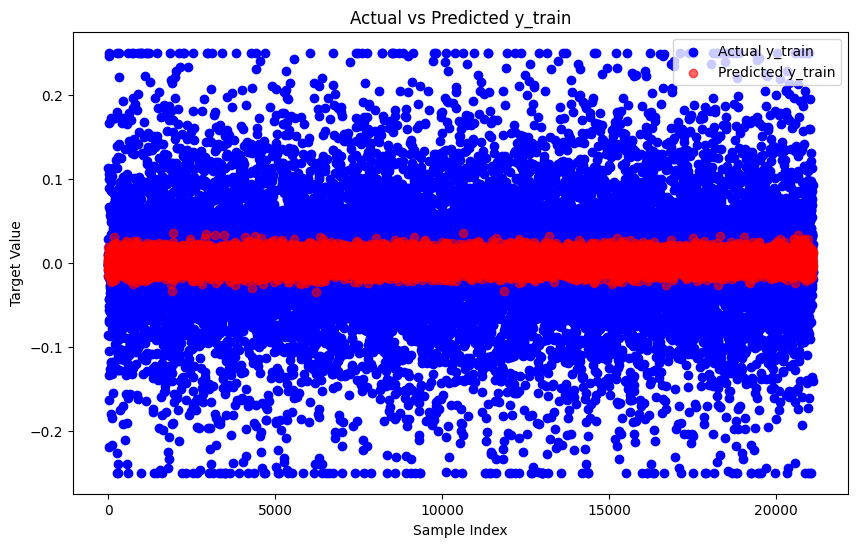

In [18]:
# Plot y_train and y_train_pred
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_split)), y_test_split, color='blue', label='Actual y_train')
plt.scatter(range(len(y_test_split)), y_pred, color='red', label='Predicted y_train', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted y_train')
plt.legend()
plt.show()


In [ ]:
y_test_pred = svm_regressor.predict(X_test_scaled)
df_output = pd.DataFrame({"row_id": np.array(test_df['row_id']), 'target': y_test_pred})

# Define filename for saving predictions
filename = "predictions_svm.csv"

# Save predictions to CSV file
df_output.to_csv(filename, index=False)



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Successfully Saved in File: predictions_svm.csv

Participants can download "predictions_svm.csv" and upload it using the "Submit Prediction" button on the competition page.

First few rows of saved predictions:


,row_id,target
0,44,0.018365
1,45,0.003906
2,46,0.015502
3,47,-0.025837
4,48,-0.001253
5,49,-0.025893
6,50,-0.008104
7,51,-0.002395
8,52,-0.031813
9,53,-0.007623
